# 잉스타 

In [4]:
!pip install selenium
!pip install psycopg2-binary
!pip install psycopg2
!pip install pyautogui

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached pyperclip-1.8.2-py3-none-any.whl
  Created wheel for pyautogui: filename=PyAutoGUI-0.9.53-py3-none-any.whl size=36613 sha256=45b46e4dcabae0c8d0e60adeeac27e271b00aa21a73127b0d420838fef7b7a85
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\d8\97\e4\d2edca92a87d3b5fbfb527264750a17b4ba297b9a7cab6e67f
  Created wheel for pygetwindow: filename=P

In [1]:
# 필요 패키지 호출
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from bs4 import BeautifulSoup
import selenium
import time
import urllib.parse
import re
import pyautogui
import random
import psycopg2
import pandas as pd
import urllib.request
import json
import openpyxl

### instagram 크롤링을 위한 함수 정의 및 준비

In [2]:
# 함수 정의 : 검색어 조건에 따른 url 생성
def insta_searching(word):
    url = f"https://www.instagram.com/explore/tags/{word}"
    return url

In [3]:
# 함수정의 : 열린 페이지에서 첫번째 게시물 클릭 + sleep 메소드 통하여 시차 두기
def select_first(driver):
    first = driver.find_elements_by_css_selector('div._9AhH0')[0]
    first.click()
    time.sleep(random.randint(2,5))

In [4]:
# 함수 정의 : 본문 내용, 작성일자, 좋아요 수, 해시태그 가져오기
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    # 본문 내용 
    try:
        content = soup.select('div.MOdxS > span')[0].text
    except:
        content = ' '
        
    # 해시태그 
    tag = re.findall(r'#[^\s#,\\]+', content)  
    # 작성일자 
    date = soup.select('time._1o9PC')[0]['datetime'][:10]
    # 좋아요
    try:
        like = soup.select('div.fDxYl > span')[0].text
    except:
        like = 0
    # 댓글에 달린 id count
    ids = len(driver.find_elements_by_css_selector('div.C4VMK > h3 > div > span > a'))


    time.sleep(3)
    
    return content, tag, date, like , ids
    
    # results = [content, tags, date, like]
    # return results

In [5]:
def reple(): # 댓글 플러스 버튼 누르기  
    while True:
        try :
            button = driver.find_element_by_css_selector('body > div.RnEpo._Yhr4 > div.pbNvD.QZZGH.bW6vo > div > article > div > div.HP0qD > div > div > div.eo2As > div.EtaWk > ul > li > div > button')
            button.click()
            time.sleep(3)
        except : 
            break

In [6]:
def re_reple(): # 대댓글 버튼 누르기

    buttons = driver.find_elements_by_css_selector('li > ul > li > div > button')

    for button in buttons:
        button.send_keys(Keys.ENTER)
        time.sleep(2)

In [7]:
# 첫 번째 게시물 클릭 후 다음 게시물 클릭
def move_next(driver):
    right = driver.find_element_by_css_selector("div.l8mY4.feth3")
    right.click()
    time.sleep(random.randint(3,5))

### instagram 크롤링 코드
* time.sleep()을 이용하여 페이지 막히는 것 예방

In [12]:
from datetime import date, timedelta, datetime
print('데이터 저장 시작' , datetime.today().strftime("%Y/%m/%d %H:%M:%S"))


#  크롤링 시작
"""
driver.get(url)을 통해 검색 페이지 접속하고,
target 변수에 크롤링할 게시글의 수를 바인딩
"""

# 인스타그램 로그인을 위한 계정 정보
username = 'gkehdgh1@gmail.com'
userpw = 'Gj8943ir$#7.a!J'
time.sleep(3)

# 크롬 브라우저 열기
driver = webdriver.Chrome(executable_path='chromedriver')
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
driver.get(r'https://www.instagram.com')
# loginUrl = 'https://www.instagram.com/accounts/login/'
time.sleep(random.randint(3,5))

# login
driver.find_element_by_name('username').send_keys(username)
driver.find_element_by_name('password').send_keys(userpw)
time.sleep(random.randint(1,2))
driver.find_element_by_css_selector('button.sqdOP.L3NKy.y3zKF').click()
time.sleep(random.randint(3,5))

# 정보 나중에 저장하기 클릭하고 넘어가기
driver.find_element_by_css_selector('button.sqdOP.L3NKy.y3zKF').click()
time.sleep(random.randint(3,5))
# 설정 나중에하기 클릭하고 넘어가기
driver.find_element_by_css_selector('button.aOOlW.HoLwm').click()
time.sleep(random.randint(3,5))


# 게시물을 조회할 검색 키워드 입력 요청
word = '치과'
url = insta_searching(word)

# 검색 결과 페이지 열기
driver.get(url)
time.sleep(random.randint(5,8))

# 첫 번째 게시물 클릭
select_first(driver)

# 본격적으로 데이터 수집시작
## 본문, 날짜, 좋아요수, 해시태그, 댓글 전체수, 전체 댓글들
contents = []
dates = []
likes = []
tags = []
id_count = []
rp = []
all_rp_times = []
# 검색범위 입력 요청
target = 3

for n in range(target):
    print(n)
    try: # 날짜, 내용, 해시태그, 좋아요 수, id로 파악한 댓글수, 전체 댓글
        reple()
        re_reple()
        content, tag, date, like, ids = get_content(driver)
        print(date)
        contents.append(content)
        dates.append(date)
        likes.append(like)
        tags.append(tag)
        id_count.append(ids)
        rp_b=[]    # 전체 댓글을 따로 리스트로 넣지않으면 array가 달라져서 활용할수 없어진다.
        bbbb = len(driver.find_elements_by_css_selector('div > li > div > div > div.C4VMK > div.MOdxS > span'))
        for i in range(bbbb) :
            replies = driver.find_elements_by_css_selector('ul:nth-child('+ str(i+2) +') > div > li > div > div > div.C4VMK > div.MOdxS > span')
            for reply in replies:
                rp_a = reply.text.strip()
                rp_b.append(rp_a)
        rp.append(rp_b)
        rp_times=[]    # 전체 댓글의 시간대
        len_rp_time = len(driver.find_elements_by_css_selector('div > li > div > div > div.C4VMK > h3 > div > span > a'))
        for i in range(len_rp_time) :
            rp_time = soup.select('ul:nth-child('+str(i+2)+')> div > li > div > div > div.C4VMK > div.qF0y9.Igw0E.IwRSH.eGOV_.acqo5._4EzTm.pjcA_.aGBdT > div > a > time')[0]['datetime'][:16]
            rp_times.append(rp_time)
        all_rp_times.append(rp_times)

        time.sleep(3)
        move_next(driver)  # 다음 게시글로
    except:
        print('fail')
        time.sleep(10)
        move_next(driver)
print('데이터 저장 시작' , datetime.today().strftime("%Y/%m/%d %H:%M:%S"))

# #엑셀로 저장      
# word = '클린디0503'  #파일이름 
# results_df = pd.DataFrame({'본문':contents,'전체 댓글 수':id_count,'태그':tags, '날짜':dates,'좋아요':likes,'댓글':rp})
# # results_df.drop_duplicates(subset = contents , inplace = True) #중복 게시글 제거
# results_df.reset_index(drop=True, inplace = True) #인덱스 재설정
# if not os.path.exists('./' + word + '.xlsx') : 
#     with pd.ExcelWriter('./' + word + '.xlsx', mode='w', engine='openpyxl') as writer : #엑셀 파일 없으면 생성
#         results_df.to_excel(writer, sheet_name = word, index=False)
# else: 
#     with pd.ExcelWriter('./' + word + '.xlsx', mode='w', engine='openpyxl') as writer : #엑셀 파일 있으면 덮어씌우기
#         results_df.to_excel(writer, sheet_name = word, index=False)
# print('완료' , datetime.today().strftime("%Y/%m/%d %H:%M:%S"))
# driver.quit()

데이터 저장 시작 2022/05/03 20:56:19


C:\Users\User\AppData\Local\Temp/ipykernel_1480/3180324564.py:25: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_name('username').send_keys(username)
C:\Users\User\AppData\Local\Temp/ipykernel_1480/3180324564.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_name('password').send_keys(userpw)
C:\Users\User\AppData\Local\Temp/ipykernel_1480/3180324564.py:28: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('button.sqdOP.L3NKy.y3zKF').click()
C:\Users\User\AppData\Local\Temp/ipykernel_1480/3180324564.py:32: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('button.sqdOP.L3NKy.y3zKF').click()
C:\Users\User\AppData\Local\Temp/ipykernel_1480/3180324564.py:35: DeprecationW

0


C:\Users\User\AppData\Local\Temp/ipykernel_1480/2672829169.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  button = driver.find_element_by_css_selector('body > div.RnEpo._Yhr4 > div.pbNvD.QZZGH.bW6vo > div > article > div > div.HP0qD > div > div > div.eo2As > div.EtaWk > ul > li > div > button')
C:\Users\User\AppData\Local\Temp/ipykernel_1480/504241238.py:21: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  ids = len(driver.find_elements_by_css_selector('div.C4VMK > h3 > div > span > a'))


2022-05-03


C:\Users\User\AppData\Local\Temp/ipykernel_1480/3180324564.py:75: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  bbbb = len(driver.find_elements_by_css_selector('div > li > div > div > div.C4VMK > div.MOdxS > span'))
C:\Users\User\AppData\Local\Temp/ipykernel_1480/3180324564.py:77: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  replies = driver.find_elements_by_css_selector('ul:nth-child('+ str(i+2) +') > div > li > div > div > div.C4VMK > div.MOdxS > span')
C:\Users\User\AppData\Local\Temp/ipykernel_1480/3180324564.py:83: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  len_rp_time = len(driver.find_elements_by_css_selector('div > li > div > div > div.C4VMK > h3 > div > span > a'))
C:\Users\User\AppData\Local\Temp/ipykernel_1480/2303173463.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elem

1
2022-04-14
fail
2
2022-05-02
fail
데이터 저장 시작 2022/05/03 20:59:04


In [11]:
#엑셀로 저장      
word = '치과실험'  #파일이름 
results_df = pd.DataFrame({'본문':contents,'전체 댓글 수':id_count,'태그':tags, '날짜':dates,'좋아요':likes,'댓글':rp,'댓글시간':all_rp_times})
# results_df.drop_duplicates(subset = contents , inplace = True) #중복 게시글 제거
results_df.reset_index(drop=True, inplace = True) #인덱스 재설정
if not os.path.exists('./' + word + '.xlsx') : 
    with pd.ExcelWriter('./' + word + '.xlsx', mode='w', engine='openpyxl') as writer : #엑셀 파일 없으면 생성
        results_df.to_excel(writer, sheet_name = word, index=False)
else: 
    with pd.ExcelWriter('./' + word + '.xlsx', mode='w', engine='openpyxl') as writer : #엑셀 파일 있으면 덮어씌우기
        results_df.to_excel(writer, sheet_name = word, index=False)
print('완료' , datetime.today().strftime("%Y/%m/%d %H:%M:%S"))
# driver.quit()

완료 2022/05/03 20:55:35


In [13]:
all_rp_times

[[]]

In [97]:
rp_many = []
for i, letter in enumerate(id_count):
    if id_count[i] > 10:
        rp_many.insert(i, str(i+1))

In [32]:
rp_each = []
for i in range(len(id_count)):
    if id_count[i] >= 10:
        rp_each.append(rp[i])

In [33]:
rp_each

[]

In [80]:
aList = [123, 'xyz', 'zara', 'abc']
aList.insert( 3, 2009)
print("Final List : ", aList)

Final List :  [123, 'xyz', 'zara', 2009, 'abc']


In [22]:
from datetime import date, timedelta, datetime
print('데이터 저장 시작' , datetime.today().strftime("%Y/%m/%d %H:%M:%S"))


#  크롤링 시작
"""
driver.get(url)을 통해 검색 페이지 접속하고,
target 변수에 크롤링할 게시글의 수를 바인딩
"""

# 인스타그램 로그인을 위한 계정 정보
username = 'gkehdgh1@gmail.com'
userpw = 'Gj8943ir$#7.a!J'
time.sleep(3)

# 크롬 브라우저 열기
driver = webdriver.Chrome(executable_path='chromedriver')
driver.get(r'https://www.instagram.com')
# loginUrl = 'https://www.instagram.com/accounts/login/'
time.sleep(random.randint(3,5))

# login
driver.find_element_by_name('username').send_keys(username)
driver.find_element_by_name('password').send_keys(userpw)
time.sleep(random.randint(1,2))
driver.find_element_by_css_selector('button.sqdOP.L3NKy.y3zKF').click()
time.sleep(random.randint(3,5))

# 정보 나중에 저장하기 클릭하고 넘어가기
driver.find_element_by_css_selector('button.sqdOP.L3NKy.y3zKF').click()
time.sleep(random.randint(3,5))
# 설정 나중에하기 클릭하고 넘어가기
driver.find_element_by_css_selector('button.aOOlW.HoLwm').click()
time.sleep(random.randint(3,5))


# 게시물을 조회할 검색 키워드 입력 요청
word = '캠핑'
url = insta_searching(word)

# 검색 결과 페이지 열기
driver.get(url)
time.sleep(random.randint(5,8))

# 첫 번째 게시물 클릭
select_first(driver)

데이터 저장 시작 2022/05/03 18:11:53


C:\Users\User\AppData\Local\Temp/ipykernel_19252/2409706408.py:23: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_name('username').send_keys(username)
C:\Users\User\AppData\Local\Temp/ipykernel_19252/2409706408.py:24: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_name('password').send_keys(userpw)
C:\Users\User\AppData\Local\Temp/ipykernel_19252/2409706408.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('button.sqdOP.L3NKy.y3zKF').click()
C:\Users\User\AppData\Local\Temp/ipykernel_19252/2409706408.py:30: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('button.sqdOP.L3NKy.y3zKF').click()
C:\Users\User\AppData\Local\Temp/ipykernel_19252/2409706408.py:33: Depreca

In [26]:
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
rp_time = soup.select('ul:nth-child('+str(0+2)+')> div > li > div > div > div.C4VMK > div.qF0y9.Igw0E.IwRSH.eGOV_.acqo5._4EzTm.pjcA_.aGBdT > div > a > time')[0]['datetime'][:16]
# rp_time.replace('T',' ')
rp_time

'2022-05-02T19:31'

In [27]:
rp_times=[]    # 전체 댓글의 시간대
len_rp_time = len(driver.find_elements_by_css_selector('div > li > div > div > div.C4VMK > h3 > div > span > a'))
for i in range(len_rp_time) :
    rp_time = soup.select('ul:nth-child('+str(i+2)+')> div > li > div > div > div.C4VMK > div.qF0y9.Igw0E.IwRSH.eGOV_.acqo5._4EzTm.pjcA_.aGBdT > div > a > time')[0]['datetime'][:16]
    rp_times.append(rp_time)
rp_times

C:\Users\User\AppData\Local\Temp/ipykernel_12216/1878956381.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  len_rp_time = len(driver.find_elements_by_css_selector('div > li > div > div > div.C4VMK > h3 > div > span > a'))


['2022-05-02T19:31', '2022-05-02T14:46']

In [13]:
rp_times

[]

In [28]:
all_rp_times=[]    
# 검색범위 입력 요청
target = 1

for n in range(target):
    print(n)
    # try: # 날짜, 내용, 해시태그, 좋아요 수, id로 파악한 댓글수, 전체 댓글
        
        # rp_b=[]    # 전체 댓글을 따로 리스트로 넣지않으면 array가 달라져서 활용할수 없어진다.
        # bbbb = len(driver.find_elements_by_css_selector('div > li > div > div > div.C4VMK > div.MOdxS > span'))
        # for i in range(bbbb) :
        #     replies = driver.find_elements_by_css_selector('ul:nth-child('+ str(i+2) +') > div > li > div > div > div.C4VMK > div.MOdxS > span')
        #     for reply in replies:
        #         rp_a = reply.text.strip()
        #         rp_b.append(rp_a)
        # rp.append(rp_b)
        
    rp_times=[]    # 전체 댓글의 시간대
    len_rp_time = len(driver.find_elements_by_css_selector('div > li > div > div > div.C4VMK > h3 > div > span > a'))
    
    rp_time = soup.select('ul:nth-child('+str(n+2)+')> div > li > div > div > div.C4VMK > div.qF0y9.Igw0E.IwRSH.eGOV_.acqo5._4EzTm.pjcA_.aGBdT > div > a > time')[0]['datetime'][:16]
    rp_times.append(rp_time)
    all_rp_times.append(rp_times)
    # except:
    #     print('fail')


0


C:\Users\User\AppData\Local\Temp/ipykernel_12216/4023631476.py:19: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  len_rp_time = len(driver.find_elements_by_css_selector('div > li > div > div > div.C4VMK > h3 > div > span > a'))


In [30]:
rp_time = soup.select('ul:nth-child(2) > div > li > div > div > div.C4VMK > div.qF0y9.Igw0E.IwRSH.eGOV_.acqo5._4EzTm.pjcA_.aGBdT > div > a > time')[0]['datetime'][:16]
rp_time

'2022-05-02T19:31'

In [ ]:
body > div.RnEpo._Yhr4 > div.pbNvD.QZZGH.bW6vo > div > article > div > div.HP0qD > div > div > div.eo2As > div.EtaWk > ul > ul:nth-child(2) > div > li > div > div > div.C4VMK > div.qF0y9.Igw0E.IwRSH.eGOV_.acqo5._4EzTm.pjcA_.aGBdT > div > a > time

In [12]:
results_df = pd.read_excel('../MZproject/클린디0503.xlsx')
results_df

,본문,전체 댓글 수,태그,날짜,좋아요,댓글
0,#협찬 @cleand_official #클린디 #클린디칫솔살균기 #도도곰팅_찐후기클...,19,"['#협찬', '#클린디', '#클린디칫솔살균기', '#도도곰팅_찐후기클린디', '...",2021-12-31,261,"['안녕하세요, 클린디입니다 :) 저희 클린디를 이쁘게 담아주시고, 섬세한 후기 작..."
1,#제품제공 양치만큼 중요한 칫솔관리!! 강력한 자연바람으로 빠르게 건조할수있으며 열...,0,"['#제품제공', '#칫솔', '#칫솔건조기', '#칫솔관리', '#칫솔살균기', ...",2021-05-31,380,[]
2,UV 칫솔살균기는 많은데바람으로 직접 건조까지 해주는 살균기라니 👏🏻 내가 찾던것굿...,2,"['#클린디', '#칫솔살균기', '#칫솔건조기']",2021-05-23,84,['꺅😍 넘 귀염뽀작한 리뷰 감사합니다:) 항상 클린디와 함께 구강건강 관리하세요💘...
3,#협찬 @cleand_official #클린디구강세정기 덕분에 구강관리셀프로 하고 ...,21,"['#협찬', '#클린디구강세정기', '#클린디', '#부모님선물', '#치아관리'...",2021-12-28,986,"['안녕하세요 클린디입니다 :) 정성 한가득, 솔직 리뷰 작성 너무 감사드립니다💙 ..."
4,제품제공_클린디 칫솔살균기는 칫솔을 자연바람으로뽀송뽀송하게 관리를 할 수 있고 칫솔...,0,"['#클린디', '#칫솔살균기', '#칫솔건조기']",2021-06-22,355,[]
...,...,...,...,...,...,...
194,🔔 실루엣의 정체는? 🔔클린디만의 기능성 #치약 4종 !클린디 찐~ 러버💗들께는 정...,2,"['#치약', '#클린디', '#cleand', '#기능성치약', '#치약', '#...",2022-01-13,8,['🏆']
195,🔔 실루엣의 정체는? 🔔클린디만의 기능성 #치약 4종 !클린디 찐~ 러버💗들께는 정...,2,"['#치약', '#클린디', '#cleand', '#기능성치약', '#치약', '#...",2022-01-13,10,['🏆']
196,🎈상큼 달콤 시원 새콤🎈#클린디 만의 맛을 가진 이것!실루엣 속에 들어갈 제품! 무...,2,"['#클린디', '#칫솔', '#치약', '#가글', '#양치', '#신제품', '...",2022-01-13,8,['🍊🍊']
197,#협찬 @cleand_official #클린디구강세정기 #클린디[클린디]구강세정기 ...,12,"['#협찬', '#클린디구강세정기', '#클린디[클린디]구강세정기', '#새해선물'...",2022-01-13,868,['요고 친구가 쓰고 있는데 좋다더라구요~ 저도 이참에 하나 장만해야겠어요~ 튼튼하...


In [36]:
f=[]

for i in range(len(results_df['댓글'])):
    f.append(results_df['댓글'][i])

# results_df = results_df['댓글']
# # results_df["태그"] = results_df["태그"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)
# results_df['댓글']

["['😮', '자기 전에도 내일 아침에 뭐 먹지..?😂😂', '앜ㅋㅋㅋㅋㅋㅋㅋ공감이네옄ㅋㅋ', '내가 붙힌 글자 때고 싶음 ㄹㅇ ㅋㅋ 삐딱😩', '현영님 넘 넘 청순!!>_< 저는..뭐 먹고싶어도 잘 못먹고있네요 ㅠㅠ!', '이쁘유😍', '앗ㅋㅋㅋㅋㅋ 공감해영❤️❤️😂', '여기 너무 좋당 💙', '공감되는 한마디네용 ㅋㅋㅋ 뭐먹지? ㅋㅋㅋ😂', '저도 공감😂😍 먹는거 젤중요👍👍', '음 점심 뭐먹지네요 ㅎㅎ', '공감이여💙젤 고심하고 …', '저듀😍😍', 'ㅎㅎ오늘 저녁 뭐 먹디..🔥', '맞아여 진ㅉㅏ공감쓰ㅠㅠ']",
 "['크아 셔츠핏 지인짜 잘받으시는 재성님☺️☺️', '옷나무인가요??', 'ㅓ할 셔츠 색감 뭐에요..!! 😍😍😍\\n민트색인가여… 🔥🔥 ㅇ랑가주망 에코백이랑도 너무 잘 어울리는거 같네요!! 👏👏👏', '갖고싶다~ 아름핏을 연출하는 다리길이👍👍', '나무라뇨 룩이 너무 예쁜데 🤎💚 색감도 최고다 재성님 🔥🔥', '브라운 컬러 슬랙스 핏감 끝내주네요😍😍 은은한 그린 컬러 셔츠까지 이런 나무가 있으면 그 나무는 유네스코에 기록 되는 거 아닌가요😂 색조합도 핏도 넘 예쁘고 멋있으십니다🔥🔥', '나무였으면 집에서 키우는데..아쉽네요😢', '제가 키우겠습니다,,,♥️', '그럼 뿌리인가욤', '내 맘 속 나무 입니당🎄', '물 주면 자라나요?', '나무에 붙은 매미할래요 저', '꽃인가요?', '와 다리 짱 길어요..🔥', '와 전체적인 컬러감 미쳤습니다🤎', '뒤에 하늘이랑 꽃에 나무같은 재성님😂 눈이 행복해지네요🔥👏', '아 이 나무 제가 물주고 영양제 주고 할수있을거 같은데 너무 멋진 나무 🤩', '초코나무숲 생각이 나네요💚', '나무가 말한다‼️‼️', '색 매치봐😍😍 나무처럼 든든하듀😍', '나무처럼 한결같은 패션 센스,,,역 싀😎', '너무 예쁜데여 ✨', '나무 줄기가 너무 긴데요..? 불공평해!!😢', '깔끔 셔츠 코디 너무 이뻐요😍', '핏보소,,', '브라운 슬랙스 진챠 찰떡이세오 ! 😮👏👏👏 남친룩 맛딥이네예 ,,', '와앙 나

In [49]:
x=[]
for i in f :
    ddd = i.replace('[','')
    x.append(ddd)
x

["'😮', '자기 전에도 내일 아침에 뭐 먹지..?😂😂', '앜ㅋㅋㅋㅋㅋㅋㅋ공감이네옄ㅋㅋ', '내가 붙힌 글자 때고 싶음 ㄹㅇ ㅋㅋ 삐딱😩', '현영님 넘 넘 청순!!>_< 저는..뭐 먹고싶어도 잘 못먹고있네요 ㅠㅠ!', '이쁘유😍', '앗ㅋㅋㅋㅋㅋ 공감해영❤️❤️😂', '여기 너무 좋당 💙', '공감되는 한마디네용 ㅋㅋㅋ 뭐먹지? ㅋㅋㅋ😂', '저도 공감😂😍 먹는거 젤중요👍👍', '음 점심 뭐먹지네요 ㅎㅎ', '공감이여💙젤 고심하고 …', '저듀😍😍', 'ㅎㅎ오늘 저녁 뭐 먹디..🔥', '맞아여 진ㅉㅏ공감쓰ㅠㅠ']",
 "'크아 셔츠핏 지인짜 잘받으시는 재성님☺️☺️', '옷나무인가요??', 'ㅓ할 셔츠 색감 뭐에요..!! 😍😍😍\\n민트색인가여… 🔥🔥 ㅇ랑가주망 에코백이랑도 너무 잘 어울리는거 같네요!! 👏👏👏', '갖고싶다~ 아름핏을 연출하는 다리길이👍👍', '나무라뇨 룩이 너무 예쁜데 🤎💚 색감도 최고다 재성님 🔥🔥', '브라운 컬러 슬랙스 핏감 끝내주네요😍😍 은은한 그린 컬러 셔츠까지 이런 나무가 있으면 그 나무는 유네스코에 기록 되는 거 아닌가요😂 색조합도 핏도 넘 예쁘고 멋있으십니다🔥🔥', '나무였으면 집에서 키우는데..아쉽네요😢', '제가 키우겠습니다,,,♥️', '그럼 뿌리인가욤', '내 맘 속 나무 입니당🎄', '물 주면 자라나요?', '나무에 붙은 매미할래요 저', '꽃인가요?', '와 다리 짱 길어요..🔥', '와 전체적인 컬러감 미쳤습니다🤎', '뒤에 하늘이랑 꽃에 나무같은 재성님😂 눈이 행복해지네요🔥👏', '아 이 나무 제가 물주고 영양제 주고 할수있을거 같은데 너무 멋진 나무 🤩', '초코나무숲 생각이 나네요💚', '나무가 말한다‼️‼️', '색 매치봐😍😍 나무처럼 든든하듀😍', '나무처럼 한결같은 패션 센스,,,역 싀😎', '너무 예쁜데여 ✨', '나무 줄기가 너무 긴데요..? 불공평해!!😢', '깔끔 셔츠 코디 너무 이뻐요😍', '핏보소,,', '브라운 슬랙스 진챠 찰떡이세오 ! 😮👏👏👏 남친룩 맛딥이네예 ,,', '와앙 나도 

In [50]:
y = []
for i in x :
    fff = i.replace(']','')
    y.append(fff)
y

["'😮', '자기 전에도 내일 아침에 뭐 먹지..?😂😂', '앜ㅋㅋㅋㅋㅋㅋㅋ공감이네옄ㅋㅋ', '내가 붙힌 글자 때고 싶음 ㄹㅇ ㅋㅋ 삐딱😩', '현영님 넘 넘 청순!!>_< 저는..뭐 먹고싶어도 잘 못먹고있네요 ㅠㅠ!', '이쁘유😍', '앗ㅋㅋㅋㅋㅋ 공감해영❤️❤️😂', '여기 너무 좋당 💙', '공감되는 한마디네용 ㅋㅋㅋ 뭐먹지? ㅋㅋㅋ😂', '저도 공감😂😍 먹는거 젤중요👍👍', '음 점심 뭐먹지네요 ㅎㅎ', '공감이여💙젤 고심하고 …', '저듀😍😍', 'ㅎㅎ오늘 저녁 뭐 먹디..🔥', '맞아여 진ㅉㅏ공감쓰ㅠㅠ'",
 "'크아 셔츠핏 지인짜 잘받으시는 재성님☺️☺️', '옷나무인가요??', 'ㅓ할 셔츠 색감 뭐에요..!! 😍😍😍\\n민트색인가여… 🔥🔥 ㅇ랑가주망 에코백이랑도 너무 잘 어울리는거 같네요!! 👏👏👏', '갖고싶다~ 아름핏을 연출하는 다리길이👍👍', '나무라뇨 룩이 너무 예쁜데 🤎💚 색감도 최고다 재성님 🔥🔥', '브라운 컬러 슬랙스 핏감 끝내주네요😍😍 은은한 그린 컬러 셔츠까지 이런 나무가 있으면 그 나무는 유네스코에 기록 되는 거 아닌가요😂 색조합도 핏도 넘 예쁘고 멋있으십니다🔥🔥', '나무였으면 집에서 키우는데..아쉽네요😢', '제가 키우겠습니다,,,♥️', '그럼 뿌리인가욤', '내 맘 속 나무 입니당🎄', '물 주면 자라나요?', '나무에 붙은 매미할래요 저', '꽃인가요?', '와 다리 짱 길어요..🔥', '와 전체적인 컬러감 미쳤습니다🤎', '뒤에 하늘이랑 꽃에 나무같은 재성님😂 눈이 행복해지네요🔥👏', '아 이 나무 제가 물주고 영양제 주고 할수있을거 같은데 너무 멋진 나무 🤩', '초코나무숲 생각이 나네요💚', '나무가 말한다‼️‼️', '색 매치봐😍😍 나무처럼 든든하듀😍', '나무처럼 한결같은 패션 센스,,,역 싀😎', '너무 예쁜데여 ✨', '나무 줄기가 너무 긴데요..? 불공평해!!😢', '깔끔 셔츠 코디 너무 이뻐요😍', '핏보소,,', '브라운 슬랙스 진챠 찰떡이세오 ! 😮👏👏👏 남친룩 맛딥이네예 ,,', '와앙 나도 오

In [53]:
for i in range(len(y)):
    if len(y[i]) > 100:
        print(y[i])

'😮', '자기 전에도 내일 아침에 뭐 먹지..?😂😂', '앜ㅋㅋㅋㅋㅋㅋㅋ공감이네옄ㅋㅋ', '내가 붙힌 글자 때고 싶음 ㄹㅇ ㅋㅋ 삐딱😩', '현영님 넘 넘 청순!!>_< 저는..뭐 먹고싶어도 잘 못먹고있네요 ㅠㅠ!', '이쁘유😍', '앗ㅋㅋㅋㅋㅋ 공감해영❤️❤️😂', '여기 너무 좋당 💙', '공감되는 한마디네용 ㅋㅋㅋ 뭐먹지? ㅋㅋㅋ😂', '저도 공감😂😍 먹는거 젤중요👍👍', '음 점심 뭐먹지네요 ㅎㅎ', '공감이여💙젤 고심하고 …', '저듀😍😍', 'ㅎㅎ오늘 저녁 뭐 먹디..🔥', '맞아여 진ㅉㅏ공감쓰ㅠㅠ'
'크아 셔츠핏 지인짜 잘받으시는 재성님☺️☺️', '옷나무인가요??', 'ㅓ할 셔츠 색감 뭐에요..!! 😍😍😍\n민트색인가여… 🔥🔥 ㅇ랑가주망 에코백이랑도 너무 잘 어울리는거 같네요!! 👏👏👏', '갖고싶다~ 아름핏을 연출하는 다리길이👍👍', '나무라뇨 룩이 너무 예쁜데 🤎💚 색감도 최고다 재성님 🔥🔥', '브라운 컬러 슬랙스 핏감 끝내주네요😍😍 은은한 그린 컬러 셔츠까지 이런 나무가 있으면 그 나무는 유네스코에 기록 되는 거 아닌가요😂 색조합도 핏도 넘 예쁘고 멋있으십니다🔥🔥', '나무였으면 집에서 키우는데..아쉽네요😢', '제가 키우겠습니다,,,♥️', '그럼 뿌리인가욤', '내 맘 속 나무 입니당🎄', '물 주면 자라나요?', '나무에 붙은 매미할래요 저', '꽃인가요?', '와 다리 짱 길어요..🔥', '와 전체적인 컬러감 미쳤습니다🤎', '뒤에 하늘이랑 꽃에 나무같은 재성님😂 눈이 행복해지네요🔥👏', '아 이 나무 제가 물주고 영양제 주고 할수있을거 같은데 너무 멋진 나무 🤩', '초코나무숲 생각이 나네요💚', '나무가 말한다‼️‼️', '색 매치봐😍😍 나무처럼 든든하듀😍', '나무처럼 한결같은 패션 센스,,,역 싀😎', '너무 예쁜데여 ✨', '나무 줄기가 너무 긴데요..? 불공평해!!😢', '깔끔 셔츠 코디 너무 이뻐요😍', '핏보소,,', '브라운 슬랙스 진챠 찰떡이세오 ! 😮👏👏👏 남친룩 맛딥이네예 ,,', '와앙 나도 오늘 셔츤데~.

In [54]:
y[0]

"'😮', '자기 전에도 내일 아침에 뭐 먹지..?😂😂', '앜ㅋㅋㅋㅋㅋㅋㅋ공감이네옄ㅋㅋ', '내가 붙힌 글자 때고 싶음 ㄹㅇ ㅋㅋ 삐딱😩', '현영님 넘 넘 청순!!>_< 저는..뭐 먹고싶어도 잘 못먹고있네요 ㅠㅠ!', '이쁘유😍', '앗ㅋㅋㅋㅋㅋ 공감해영❤️❤️😂', '여기 너무 좋당 💙', '공감되는 한마디네용 ㅋㅋㅋ 뭐먹지? ㅋㅋㅋ😂', '저도 공감😂😍 먹는거 젤중요👍👍', '음 점심 뭐먹지네요 ㅎㅎ', '공감이여💙젤 고심하고 …', '저듀😍😍', 'ㅎㅎ오늘 저녁 뭐 먹디..🔥', '맞아여 진ㅉㅏ공감쓰ㅠㅠ'"

#### 한글 깨짐을 합쳐주기

In [ ]:
 pip install hangul-utils

  Created wheel for hangul-utils: filename=hangul_utils-0.2-py3-none-any.whl size=3264 sha256=0e7ff9a90d49cc79a0d516b13a98f00622d28d91b9a9627c400adaec3f5d6ace
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\12\e5\dc\92e385dc96ad3720e5396a2b7a694f70a3630883b7b6972c05
Successfully built hangul-utils
Note: you may need to restart the kernel to use updated packages.


In [22]:
from hangul_utils import split_syllables, join_jamos

In [28]:
aaaa = []  # 데이터 프레임에서 자음과 모음 분할된것 하나로 합쳐주기
for i in range(len(results_df["댓글"])):
    jamo = split_syllables(results_df["댓글"][i])
    chars = list(set(jamo))
    char_to_ix = { ch:i for i,ch in enumerate(chars) }
    ix_to_char = { i:ch for i,ch in enumerate(chars) }
    jamo_numbers = [char_to_ix[x] for x in jamo]
    restored_jamo = ''.join([ix_to_char[x] for x in jamo_numbers])
    restored_text = join_jamos(restored_jamo)
    aaaa.append(restored_text)
print(aaaa)

["['달달한거 좋아하시는 것 같아요~~ㅎㅎ^^ 그래서 파인프라를 쓰시는구나 싶어요~~ㅎㅎ☺😊😄', '아웅 벤티사이즈로 😍😍👏👏', '바닐라 라떼 너무 맛나 보여요^^', '그대로놔두면 치매에 알츠하이머까지요?😂 ...무서워욧..', '한주의 시작도 기쁜마음으로😍😍', '❤️❤️❤️❤️❤️❤️🇰🇷🇰🇷🇰🇷🇰🇷🇰🇷🇰🇷🇰🇷🇰🇷', '이번주도 홧팅입니다🙌', '소통해요🔥좋은 하루 되세요~!', '👏👏👏👏']", "['@chan0_223', '@pspyeong', '@0117.j @117_januel', '@jieun02059653 공감', '@water__a__ 첫번째 사진 마냥 온 신경이 아픔 가라', '@god_mimi_s2 이거 첫번째 사진 넘 무섭다😭', '@y_kevin88 조심혀', '@yes_or_uno', '@suri_m92 😮😮😮', '@yudini._.j 😮', '@yun._.jiji 넌 정말 대다네', '@ottff_kjh_s 치과무셔', '@chaechae_e.e', '@jb__kyu', '@dearyunju', '@hojin4636 요즣 치과땜에 고생하는 너와 나', '@sm0keerrday', '@i_love_u_dy070105 소름 나 충치 생긴거 알고 뜨워주냐… ㅋㅋㅋㅋㅋㅋㅋㅋㅋ난 억울하다고', '@kimbokyungee', '@gwon1115', '@j.iiiin2 피부과 정기권보다 치과 정기권 끊어야할 것 같은데 대구 치과 괜차는 곳 알아보쟈..', '@hyehe_hehe_0805', '@juho_0228', '@seolli_o 개존같네', '@__vely.e', '@14.9012', '@jinju0227', '@shine_left_eye', '@mi_ga_mi_ga', '@sehee___pp', '@sso_1.27', '@2_ji_soo_ ㅜㅜ', '@yeinee_s2 ㅋㅋ', '@aweekyeong 응?서아?ㅜㅜ', '@h.tae____ 이래서 머리가 아픈거야!', '@ooo_rinni 예린아...trigeminal nerve의 3

In [29]:
results_df.to_excel(excel_writer='sample.xlsx') #엑셀로 저장

### 인스타 DB를 이용한 시각화 
* 그래프 그리기 함수 정의

In [33]:
# line & bar 그래프
def plot2(x,y,title,kind, xlabel, ylabel):
    import platform
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    import seaborn as sns

    # 한글 깨지는 현상 수정
    system_name = platform.system()
    if system_name == 'Windows':
        # Windows 운영체제
        plt.rc('font', family='Malgun Gothic')
    elif system_name == 'Darwin':
        # Mac OS
        plt.rc('font', family='AppleGothic')
    elif system_name == 'Linux':
        # Linux
        path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
        font_name = fm.FontProperties(fname=path, size=12)
        plt.rc('font', family=font_name)
    else:
        print("Not support")

    # 그래프 그리기
    colors = sns.color_palette("pastel", len(x)) ## 색상 지정
    plt.figure(figsize=(10,5))
    if kind == 'line':
        plt.plot(x,y,label=ylabel,marker='H')
            

    elif kind == 'bar':
        plt.bar(x,y,color=colors,edgecolor='black')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

* MBTI별 언급된 수 (인스타)

In [7]:
# Count DB 데이터 불러오기 (863)
try:
    cur.execute("select * from public.count;") # sql 문장
    conn.commit()
    count = cur.fetchall()
    
except:
    conn.rollback()
    print("--- DB error")

No handles with labels found to put in legend.


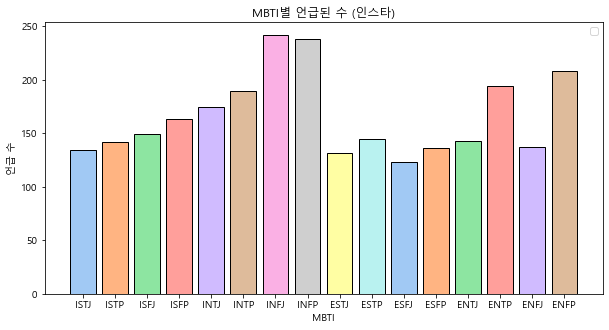

In [27]:
# 그래프 그리기
mbti = []
n = []
for i in range(0,len(count)):
    mbti.append(count[i][0])
    n.append(count[i][1])

plot2(mbti,n,'MBTI별 언급된 수 (인스타)','bar','MBTI','언급 수')

In [14]:
# DB 데이터 조회 불러오기 (INFJ, INFP, ENFP)
top3 = ['infj', 'infp', 'enfp']
idx = 0

top3_df = pd.DataFrame(columns=['mbti','전체게시물', '좋아요 게시물', '1000개이상', '500개이상',  '500개미만'])

for m in top3:
    try:
        cur.execute(f"select * from public.insta_{m};")
        conn.commit()
        mbti_kind = cur.fetchall()
        
        n1,n2,n3 = 0,0,0 # n1 : 1000개이상 n2 : 500개이상 n3 : 나머지
        for i in range(0,len(mbti_kind)):
            # like의 형태가 '좋아요 1,245개'이므로, 1245 형태로 변환 작업 실시 
            if '좋' in mbti_kind[i][3]:
                if int(mbti_kind[i][3][4:-1].replace(',','')) > 999:
                    n1 += 1
                elif int(mbti_kind[i][3][4:-1].replace(',','')) > 499:
                    n2 += 1
                else:
                    n3 += 1
        top3_df.loc[idx] = [m,len(mbti_kind),(n1+n2+n3),n1,n2,n3,]
        idx += 1
          
    except:
        conn.rollback()
        print("--- DB error")

mbti_kind[0][3]

'좋아요 1,245개'

In [36]:
전체대비좋아요 = []
좋아요대비1000 = []
좋아요대비500 = []

# 좋아요 변수 정의 (반올림 작업)
for i in range(0,len(top3_df)):
    a1 = round((top3_df.iloc[i][2]/top3_df.iloc[i][1]*100), 2)
    a2 = round((top3_df.iloc[i][3]/top3_df.iloc[i][1]*100), 2)
    a3 = round(((top3_df.iloc[i][3]+top3_df.iloc[i][4])/top3_df.iloc[i][2]*100), 2)

    전체대비좋아요.append(a1)
    좋아요대비1000.append(a2)
    좋아요대비500.append(a3)

# Dataframe 열 추가
top3_df['전체대비좋아요']=전체대비좋아요
top3_df['좋아요대비1000']=좋아요대비1000
top3_df['좋아요대비500']=좋아요대비500

top3_df

,mbti,전체게시물,좋아요 게시물,1000개이상,500개이상,500개미만,전체대비좋아요,좋아요대비1000,좋아요대비500
0,infj,480,373,37,39,297,77.71,7.71,20.38
1,infp,491,415,43,27,345,84.52,8.76,16.87
2,enfp,495,433,25,29,379,87.47,5.05,12.47


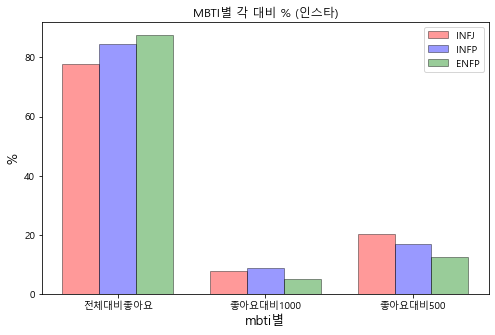

In [39]:
## 그래프 그리기
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
plt.figure(figsize=(8,5))
bar_width = 0.25

# MBTI가 3개이므로 0, 1, 2 위치를 기준으로 삼음
index = np.arange(3)

# 각 변수별로 3개 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, list(top3_df.loc[0][6:]), bar_width, alpha=0.4, color='red', label='INFJ',edgecolor='black')

b2 = plt.bar(index + bar_width, list(top3_df.loc[1][6:]), bar_width, alpha=0.4, color='blue', label='INFP',edgecolor='black')

b3 = plt.bar(index + 2 * bar_width, list(top3_df.loc[2][6:]), bar_width, alpha=0.4, color='green', label='ENFP',edgecolor='black')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 3 + bar_width, 1), ['전체대비좋아요','좋아요대비1000','좋아요대비500'])

# x축, y축 이름 및 범례 설정
plt.xlabel('mbti별', size = 13)
plt.ylabel('%', size = 13)
plt.title('MBTI별 각 대비 % (인스타)')
plt.legend()

### 도서 API

In [30]:
client_id = "SFBVy_Sps38LXkNxHNoq"
client_secret = "zlixlrNhi3"

query = urllib.parse.quote(input('검색할 단어'))
display = 100
start = 1
end = 1000
idx = 0
sort = 'sim'

df = pd.DataFrame(columns=['Title', 'Link',  'Publisher', 'Isbn', 'Pubdate', 'Description'])

for start_index in range(start, end, display):
    url = "https://openapi.naver.com/v1/search/book?query=" + query + \
        "&display=" + str(display) + \
        "&start=" + str(start_index) + \
        "&sort=" + sort
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if (rescode == 200):
        response_body = response.read()
        items = json.loads(response_body.decode('utf-8'))["items"]
        remove_tag = re.compile('<.*?>')
        for item_index in range(0, len(items)):
            title = re.sub(remove_tag, '', items[item_index]['title']) # 제목
            link = items[item_index]['link'] # 하이퍼텍스트 link
            image = items[item_index]['image'] # 썸네일 이미지의 URL
            author = items[item_index]['author'] # 저자
            price = items[item_index]['price'] # 정가
            discount = items[item_index]['discount'] # 할인가격
            publisher = items[item_index]['publisher'] # 출판사
            isbn = items[item_index]['isbn'] # 국제표준도서번호(ISBN) 넘버
            description = re.sub(remove_tag, '', items[item_index]['description']) # 검색결과 문서의 내용 요약
            pubdate = items[item_index]['pubdate'] # 출간일

            df.loc[idx] = [title, link, publisher, isbn, pubdate, description]
            idx += 1
    else:
        print("Error Code: " + rescode)

df.loc[0:3]

,Title,Link,Publisher,Isbn,Pubdate,Description
0,흔한남매 흔한 MBTI (믿거나 말거나 나에게 어울리는 직업),http://book.naver.com/bookdb/book_detail.php?b...,대원키즈,1136273794 9791136273796,20210901,흔한남매와 함께 떠나는MBTI 유형별 직업 여행『흔한 MBTI』는 널리 알려진 MB...
1,우리들의 MBTI (나의 성격을 이해하고 더 멋진 내가 되는),http://book.naver.com/bookdb/book_detail.php?b...,다산어린이,1130639401 9791130639406,20210726,MBTI는 성격 유형마다 타고난 강점을 활용하고 단점을 보완하면서 성장할 수 있는 ...
2,나의 MBTI가 궁금하단 마리몽,http://book.naver.com/bookdb/book_detail.php?b...,더모던,1164455354 9791164455355,20211130,"여러분의 MBTI는 무엇입니까?\n\n혈액형 A형은 소심하고, O형은 활발하다고 유..."
3,MBTI의 의미 (MBTI는 과학인가?),http://book.naver.com/bookdb/book_detail.php?b...,하움출판사,1164407112 9791164407118,20201119,&quot;MBTI는 과학적인가?&quot; 이 질문에 대한 나의 대답은 이것이다....


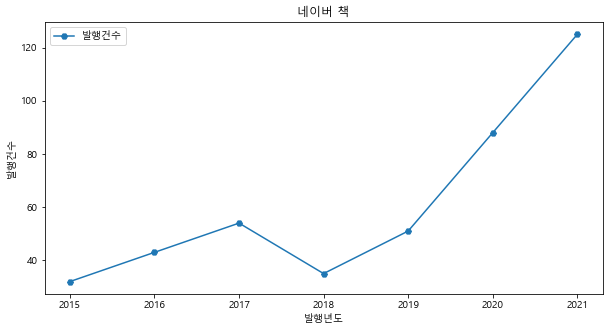

In [34]:
# 데이터 정제
date = {'2015':0,'2016':0,'2017':0,'2018':0,'2019':0,'2020':0,'2021':0}
date_k = list(date.keys())

for i in range(0,len(df)):
    for j in range(0,len(date_k)):
        if date_k[j] in df['Pubdate'][i]:
            date[date_k[j]] += 1

date_v = list(date.values())

# 그래프 그리기
plot2(date_k, date_v, '네이버 책','line','발행년도','발행건수')